# **Split two points**
---
which solution gives a smaller error:

**Solution 1:** $$ X_{1} + X_{2} $$

**Solution 2:** $$ 10X_{1} + 10X_{2} $$

Remember prediction is: $$ \hat{y} = \sigma(w_{1}x_{1}+w_{2}x_{2}+b) $$


In [60]:
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

def output_formula(features, weights):
    return sigmoid(np.dot(features,weights))

def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1-output)
features = np.array([[1, 1], [-1, -1]])
targets = np.array([[1], [0]])
weights = np.array([[1], [1]]) # You only need change the weights (10,10) to (1,1) or (1,1) to (10,10)
for x, y in zip(features, targets):
            output = output_formula(x, weights)
            error = error_formula(y, output)
out = output_formula(features, weights)
loss = np.mean(error_formula(targets, out))      
print(out)
print(loss)


[[0.88079708]
 [0.11920292]]
0.12692801104297258


## Pytorch
##funcionalities
---

In [0]:
import torch

In [0]:
def activation(x):
  """ Sigmoid activation function
  Arguments
  ---------
  x: torch.Tensor
  """
  return 1/(1+torch.exp(-x))

In [0]:
### Create some data
torch.manual_seed(7) # Set the random seed so things are predictable

## Features are 5 random normal variables
features = torch.randn((1,5)) # creates a tensor with shape (1,5) that contains values distribuited acording
                              # to the normal distribution with a mean of 0 and standard desviation of 1
## True weights for our data, random normal variables again
weights = torch.randn_like(features) # creates another tensor with the same shape of features
# And a true bias term 
bias = torch.randn((1,1))

**To do a matrix multiplication you can use:**

`torch.mm(features,weights) ` or `torch.matmul(features,weights) `

**To resize your tensor, you can use:**

*   `variable.reshape(a,b)` will return a new tensor with the same data as 
`variable` with the size(a,b) sometimes, and sometimes a clone, as in it copies the data to another part of memory
*   `variable.resize_(a,b) ` returns the same tensor with a different shape. However, if the new shape results in fewer elements than the original tensor (but not from memory). If the new shape results in more elements than the original tensor, new elments will be unitialized in memory.
*   `variable.view(a,b) ` will return a new tensor with the same data as 
`variable` with the size(a,b)





In [64]:
### Other form with .sum()
y = activation(torch.sum(weights * features) + bias)
print(y)
activation(torch.mm(weights, features.view(5,1)) + bias)

tensor([[0.1595]])


tensor([[0.1595]])

In [0]:
# Generate some data 
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables 
features = torch.randn((1,3))

# Define the size of  each layer in our network
n_input = features.shape[1]       # number of input units, must match number of input features
n_hidden = 2                      # number of hidden units
n_output = 1                      # number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input,n_hidden)

# Weights for hidden layers to output
W2 = torch.randn(n_hidden,n_output)

# And bias terms for hidden and output layers
B1 = torch.randn((1,n_hidden))
B2 = torch.randn((1,n_output))

h = activation(torch.mm(features, W1) + B1 )
output = activation(torch.mm(h, W2) + B2 )


## **Numpy to torch and back**
---

In [66]:
import numpy as np

a  = np.random.rand(4,3)
a

array([[0.74496944, 0.68649568, 0.28245391],
       [0.14793153, 0.26640771, 0.55684472],
       [0.09026319, 0.45217134, 0.84413061],
       [0.98005796, 0.93923061, 0.11866721]])

In [67]:
b = torch.from_numpy(a)
b

tensor([[0.7450, 0.6865, 0.2825],
        [0.1479, 0.2664, 0.5568],
        [0.0903, 0.4522, 0.8441],
        [0.9801, 0.9392, 0.1187]], dtype=torch.float64)

In [68]:
b.numpy()

array([[0.74496944, 0.68649568, 0.28245391],
       [0.14793153, 0.26640771, 0.55684472],
       [0.09026319, 0.45217134, 0.84413061],
       [0.98005796, 0.93923061, 0.11866721]])

The memory is shared between the numpy array and torch tensor, so if you change the values in_place of one object , the other will change as well

In [69]:
# Multiply pytorch tensor by 2, in place 
b.mul_(2)

tensor([[1.4899, 1.3730, 0.5649],
        [0.2959, 0.5328, 1.1137],
        [0.1805, 0.9043, 1.6883],
        [1.9601, 1.8785, 0.2373]], dtype=torch.float64)

### Neural networks  with pytorch 

In [0]:
# Import necesary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt


Next I'll import a dataset inside torchvision named MNIST, dataset consists of greyscale handwritten digits. Each image is 28x28 pixels.

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

We have the training data loaded into `trainloader ` and we make that in an iterator with iter(trainloader). Later  we´ll use this loop through the dataset for training, like:



In [0]:
#for image, label in trainloader:
  #  Do things with images and labels 

You'll notice I created the `trainloader` with a batch size of 64, and `shuffle=True`. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that `images ` is just a tensor with size (64, 1, 28, 28). So 64 images per batch, 1 color channel and 28x28 images

In [73]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


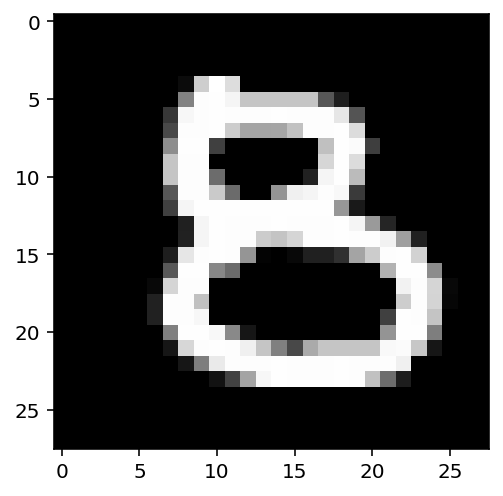

In [74]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

First, let's try to build a simple network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

The networks you've seen so far are called fully-connected or dense networks. Each unit in one layer is connected to each unit in the next layer. In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape (64, 1, 28, 28) to a have a shape of (64, 784), 784 is 28 times 28. This is typically called flattening, we flattened the 2D images into 1D vectors.

Previously you built a network with one output unit. Here we need 10 output units, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network output into a probability distribution next.



*   **Exercise:** Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.



In [75]:
def activation(x):
  return 1/(1+torch.exp(-x))

# Flatten the inputs
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1 )
out = torch.mm(h, w2) + b2
print(out.shape)

torch.Size([64, 10])


Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this:

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

$$ \sigma(x_{i}) = \frac{e^{x_{i}}}{\sum_{k}^{K} e^{x_{k}}} $$

What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.



> **Exercise:** Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.



In [76]:
def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1,1)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


###Building networks with PyTorch
---
PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [0]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Let's go through this bit by bit.



> `class Network(nn.Module):`


Here we're inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.

> `self.hidden = nn.Linear(784, 256)`

This line creates a module for a linear transformation, $$x\mathbf{W} + b$$, with 784 inputs and 256 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

>`self.output = nn.Linear(256, 10)`

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

>`self.sigmoid = nn.Sigmoid()`

>`self.softmax = nn.Softmax(dim=1)`

Here I defined operations for the sigmoid activation and softmax output. Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

>def forward(self, x):

PyTorch networks created with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations you defined in the __init__ method.

>` x = self.hidden(x)`

> `x = self.sigmoid(x)`

> `x = self.output(x)`

> `x = self.softmax(x)`

Here the input tensor x is passed through each operation and reassigned to x. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the __init__ method doesn't matter, but you'll need to sequence the operations correctly in the forward method.

Now we can create a Network object.

In [78]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define the network somewhat more concisely and clearly using the torch.nn.functional module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as F, import torch.nn.functional as F.

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.

In [80]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to fully-connected layer-1 linear transformation
        self.fc1 = nn.Linear(784, 128)
        # fully-connected layer-1 to fully-connected layer-2 linear transformation
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 unitsfor each digit
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # fc1 layer with ReLu activation
        x = F.relu(self.fc1(x))
        # fc2 layer with ReLu activation
        x = F.relu(self.fc2(x))
        # Output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

##Initializing weights and biases
---
The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.

In [81]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0033, -0.0026, -0.0164,  ..., -0.0308,  0.0194,  0.0055],
        [-0.0038,  0.0220,  0.0195,  ...,  0.0263, -0.0158,  0.0255],
        [-0.0271,  0.0259, -0.0018,  ..., -0.0255, -0.0197,  0.0196],
        ...,
        [-0.0226, -0.0048, -0.0072,  ..., -0.0170,  0.0275, -0.0274],
        [-0.0028,  0.0030,  0.0137,  ..., -0.0046, -0.0090,  0.0115],
        [-0.0302,  0.0081, -0.0323,  ..., -0.0194, -0.0074,  0.0023]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0167,  0.0271,  0.0063, -0.0016,  0.0206, -0.0016,  0.0036, -0.0076,
         0.0105, -0.0310, -0.0025, -0.0094,  0.0347, -0.0294, -0.0061,  0.0052,
         0.0052,  0.0115,  0.0229, -0.0134, -0.0010,  0.0006, -0.0315,  0.0100,
        -0.0288,  0.0176,  0.0343,  0.0254, -0.0033,  0.0076, -0.0077, -0.0086,
         0.0209, -0.0210,  0.0286,  0.0117, -0.0188,  0.0013, -0.0105, -0.0211,
         0.0009,  0.0022, -0.0245,  0.0222, -0.0050, -0.0263, -0.0247, -0.0289,
         0.0260


For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [82]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-1.8894e-03, -1.0166e-02,  6.4258e-03,  ...,  6.9197e-03,
          3.6752e-03,  1.4070e-02],
        [-7.7408e-03,  5.9104e-03,  2.5856e-03,  ..., -8.1237e-03,
          9.8138e-05,  1.1175e-02],
        [ 8.8960e-03, -6.4789e-03,  1.5649e-02,  ...,  2.7435e-04,
         -7.3366e-03,  2.2125e-02],
        ...,
        [-3.7657e-03,  4.1685e-03,  7.7986e-03,  ..., -1.6920e-02,
          8.5150e-04, -5.2015e-03],
        [ 4.2577e-03, -1.6907e-03, -5.5836e-04,  ..., -1.1571e-02,
          1.2550e-02,  1.4432e-02],
        [ 1.3073e-02,  8.6931e-03,  8.6083e-03,  ...,  9.8246e-03,
         -1.2997e-02,  1.3015e-02]])